#Import the libraries

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import RandomOverSampler

import plotly.express as express

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Reshape
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.layers import Input, Flatten

#Accuracy Function

In [ ]:
def cal_accuracies(y_test, y_pred):
  print('\nClassification Report:\n')
  print(classification_report(y_test, y_pred, target_names = ["Class 0", "legit Class 1"]))
  print('\nConfusion Matrix:\n')
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print('\nAccuracy Score:\n')
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  print('\Confusion Matrix Display:\n')
  print(ConfusionMatrixDisplay(cm).plot())
  return accuracy

#Read the dataset

In [ ]:
data = pd.read_csv("MCSDatasetNEXTCONLab.csv")

In [ ]:
data

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


#Splitting to features and label

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [ ]:
x

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784
...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015


In [ ]:
y

,Ligitimacy
0,1
1,1
2,1
3,1
4,1
...,...
14479,1
14480,1
14481,1
14482,1


#Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [ ]:
x_train

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
7914,2206,45.504761,-75.214953,2,23,44,50,20,1,79,0,234615
1225,334,45.518957,-75.229820,0,21,35,60,20,7,43,0,262765
10484,2909,45.520886,-75.215634,0,22,53,10,10,5,85,0,262767
7385,2066,45.402016,-75.272772,5,4,48,50,50,1,76,0,56312
959,262,45.409482,-75.210547,2,22,17,30,10,7,72,0,75088
...,...,...,...,...,...,...,...,...,...,...,...,...
4647,1276,45.535918,-75.173689,3,22,14,20,20,4,100,0,290924
3913,1068,45.387016,-75.175443,1,4,24,60,60,7,89,0,28172
752,209,45.469609,-75.154622,4,15,38,60,40,8,53,0,178319
6162,1724,45.404649,-75.246293,5,11,41,50,10,9,46,0,65699


#Oversampling the training data

In [ ]:
ov = RandomOverSampler(sampling_strategy= 'minority')
x_train_resampled, y_train_resampled = ov.fit_resample(x_train, y_train)

In [ ]:
x_train_resampled

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,2206,45.504761,-75.214953,2,23,44,50,20,1,79,0,234615
1,334,45.518957,-75.229820,0,21,35,60,20,7,43,0,262765
2,2909,45.520886,-75.215634,0,22,53,10,10,5,85,0,262767
3,2066,45.402016,-75.272772,5,4,48,50,50,1,76,0,56312
4,262,45.409482,-75.210547,2,22,17,30,10,7,72,0,75088
...,...,...,...,...,...,...,...,...,...,...,...,...
20125,1341,45.467918,-75.154732,1,8,34,10,10,8,68,1,168935
20126,2788,45.468814,-75.152152,2,8,16,40,10,3,45,1,168935
20127,654,45.485833,-75.218040,4,13,51,50,20,10,32,0,206463
20128,3861,45.487734,-75.218539,2,12,42,60,10,7,55,0,206463


#Apply models

##Random Forest

In [ ]:
RF_model = RandomForestClassifier(random_state=42)
RF_model = RF_model.fit(x_train_resampled, y_train_resampled)
y_pred_RF = RF_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
y_pred_RF

array([1, 0, 1, ..., 1, 1, 1])


Classification Report:

               precision    recall  f1-score   support

      Class 0       1.00      0.99      0.99       375
legit Class 1       1.00      1.00      1.00      2522

     accuracy                           1.00      2897
    macro avg       1.00      1.00      1.00      2897
 weighted avg       1.00      1.00      1.00      2897


Confusion Matrix:

[[ 372    3]
 [   1 2521]]

Accuracy Score:

0.9986192613047981
\Confusion Matrix Display:



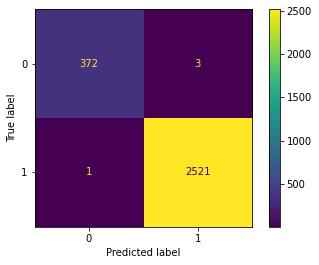

In [ ]:
RF_acc = cal_accuracies(y_test, y_pred_RF)

##Adaboost 

In [ ]:
AD_model  = AdaBoostClassifier(n_estimators=100, random_state=42)
AD_model = AD_model.fit(x_train_resampled, y_train_resampled)
y_pred_AB = AD_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
y_pred_AB

array([1, 0, 1, ..., 1, 1, 1])


Classification Report:

               precision    recall  f1-score   support

      Class 0       0.72      0.99      0.84       375
legit Class 1       1.00      0.94      0.97      2522

     accuracy                           0.95      2897
    macro avg       0.86      0.97      0.90      2897
 weighted avg       0.96      0.95      0.95      2897


Confusion Matrix:

[[ 371    4]
 [ 142 2380]]

Accuracy Score:

0.9496030376251294
\Confusion Matrix Display:



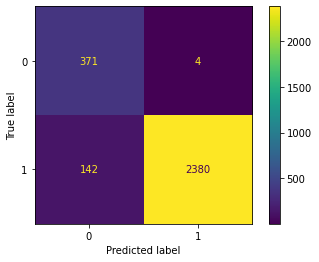

In [ ]:
AB_acc = cal_accuracies(y_test, y_pred_AB)

##Plot 

In [ ]:
values = [RF_acc, AB_acc]
axis_x = ['RF', 'Adaboost']
fig=express.bar(x=axis_x, y=values, title="Accuracy Under Original Test Dataset", labels=dict(x="Models", y="Accuracy"))
fig.update_yaxes(tick0=0.5, dtick=0.05)
fig.update_yaxes(showgrid=False)
fig.show()

#GAN

##MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_test_scaled

array([[0.96324081, 0.92083502, 0.49990828, ..., 0.4       , 0.        ,
        0.89997416],
       [0.31657914, 0.68199069, 0.14896806, ..., 0.25714286, 1.        ,
        0.67495864],
       [0.34133533, 0.86389702, 0.91261469, ..., 0.22857143, 1.        ,
        0.85000919],
       ...,
       [0.8432108 , 0.44909557, 0.67515125, ..., 0.34285714, 0.        ,
        0.45001505],
       [0.57289322, 0.66896582, 0.60065162, ..., 0.67142857, 0.        ,
        0.64999747],
       [0.21830458, 0.59749968, 0.17413294, ..., 0.47142857, 1.        ,
        0.57496743]])

##discriminator

In [ ]:
def define_discriminator():
  model = Sequential()
  #input layer
  model.add(Flatten(input_shape=x_train_scaled.shape[1:]))

  def add_discriminator_block(neurons, alpha = 0.3):
    model.add(Dense(neurons))
    model.add(LeakyReLU(alpha))   

  add_discriminator_block(256)
  add_discriminator_block(512)
  
  model.add(Dense(1, activation='sigmoid'))

  # model.summary()

  data = Input(shape=x_train_scaled.shape[1:])
  output = model(data)

  return Model(data, output)

##generator

In [ ]:
noise_shape = (100,)

#latent_dim is the dimension of the latent vector (e.g., 100)
def define_generator():    
  model = Sequential()

  def add_generator_block(neurons, alpha = 0.3):
    model.add(Dense(neurons))
    model.add(LeakyReLU(alpha))
    model.add(BatchNormalization())

  #input layer
  model.add(Dense(256, input_shape=noise_shape))
  model.add(LeakyReLU(alpha=.3))
  model.add(BatchNormalization())
  
  add_generator_block(512)
  add_generator_block(1024)

  model.add(Dense(np.prod(x_train_scaled.shape[1:]), activation='tanh'))
  #This is my output layer which should represent my fake generated image
  model.add(Reshape(x_train_scaled.shape[1:])) 

  # model.summary()

  noise = Input(shape=noise_shape)
  data = model(noise)

  return Model(noise, data)

##Train GAN

In [ ]:
def train(epochs, batch, generator, discriminator, combined):
  half_batch = int(batch / 2)
  for epoch in range(epochs):

    # train discriminator
    indices = np.random.randint(0, x_train_scaled.shape[0], half_batch)
    data = x_train_scaled[indices]

    #normal distribution noise
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_data = generator.predict(noise)
    
    discriminator_loss_real = discriminator.train_on_batch(data, np.ones((half_batch, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((half_batch, 1)))
    discriminator_loss = .5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    # train generator
    noise = np.random.normal(0,1, (batch, 100))
    valid_y = np.array([1]*batch)
    generator_loss = combined.train_on_batch(noise, valid_y)

    print("epoch: %d Discriminator loss: %f - Generator loss: %f" % (epoch+1,
                                                                    discriminator_loss[0],
                                                                    generator_loss))

In [ ]:
discriminator = define_discriminator()
discriminator.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])

generator = define_generator()
generator.compile(loss="binary_crossentropy", optimizer= "adam")

noise = Input(shape=(100,))
fake_data = generator(noise)

discriminator.trainable = False

valid = discriminator(fake_data)

combined = Model(noise, valid)
combined.compile(loss="binary_crossentropy", optimizer= "adam")

train(500, 32, generator, discriminator, combined)

epoch: 1 Discriminator loss: 0.743881 - Generator loss: 0.617669
epoch: 2 Discriminator loss: 0.609130 - Generator loss: 0.617783
epoch: 3 Discriminator loss: 0.582344 - Generator loss: 0.617352
epoch: 4 Discriminator loss: 0.504069 - Generator loss: 0.722302
epoch: 5 Discriminator loss: 0.505891 - Generator loss: 0.710431
epoch: 6 Discriminator loss: 0.382307 - Generator loss: 0.837508
epoch: 7 Discriminator loss: 0.387886 - Generator loss: 0.951931
epoch: 8 Discriminator loss: 0.298922 - Generator loss: 0.971158
epoch: 9 Discriminator loss: 0.307615 - Generator loss: 1.192907
epoch: 10 Discriminator loss: 0.247771 - Generator loss: 1.678149
epoch: 11 Discriminator loss: 0.136343 - Generator loss: 1.393214
epoch: 12 Discriminator loss: 0.239063 - Generator loss: 1.538197
epoch: 13 Discriminator loss: 0.170828 - Generator loss: 1.771629
epoch: 14 Discriminator loss: 0.148847 - Generator loss: 2.363799
epoch: 15 Discriminator loss: 0.176257 - Generator loss: 2.125154
epoch: 16 Discrimin

#Generate Fake Data

In [ ]:
new_fake_scaled = generator.predict(np.random.normal(0, 1, (1000, 100)))
pd.DataFrame(new_fake_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.998731,-0.928944,0.623888,0.892624,0.781644,0.882846,0.152395,0.132759,-0.509205,-0.050465,-0.982832,-0.885357
1,0.774669,0.999996,0.611965,0.734027,0.534774,0.869223,0.999923,0.214865,0.999565,0.993074,0.999941,0.999936
2,0.619393,0.999939,0.510608,0.601337,0.498849,0.654515,0.999467,0.206532,0.997307,0.985556,0.999517,0.999519
3,0.847083,1.000000,0.485383,0.900767,0.514376,0.896539,0.999996,0.638939,0.999987,0.999238,0.999998,0.999992
4,0.974898,0.835256,0.313175,0.511008,0.799219,0.145615,0.758353,0.016510,0.049509,-0.182934,0.166972,0.969837
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.399686,1.000000,0.601850,0.740838,0.438788,0.882673,0.999997,0.479042,0.999913,0.999258,0.999998,0.999966
996,0.046256,1.000000,0.820530,0.931043,0.078248,0.995315,1.000000,0.695652,1.000000,1.000000,1.000000,1.000000
997,0.485851,0.999995,0.529999,0.856772,0.726184,0.629337,0.999890,0.375936,0.999803,0.994280,0.999977,0.999953
998,0.999633,-0.959580,0.924238,0.994148,0.715244,0.997967,0.960750,0.506445,0.763460,0.018045,-0.998679,-0.980485


##new fake scaled to dataframe

In [ ]:
new_fake_scaled = pd.DataFrame(new_fake_scaled, columns=['ID', 'Latitude','Longitude',
                                                         'Day',	'Hour',	'Minute',
                                                         'Duration','RemainingTime',	'Resources'	,
                                                         'Coverage',	'OnPeakHours',	'GridNumber'])

new_fake_scaled

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,0.998731,-0.928944,0.623888,0.892624,0.781644,0.882846,0.152395,0.132759,-0.509205,-0.050465,-0.982832,-0.885357
1,0.774669,0.999996,0.611965,0.734027,0.534774,0.869223,0.999923,0.214865,0.999565,0.993074,0.999941,0.999936
2,0.619393,0.999939,0.510608,0.601337,0.498849,0.654515,0.999467,0.206532,0.997307,0.985556,0.999517,0.999519
3,0.847083,1.000000,0.485383,0.900767,0.514376,0.896539,0.999996,0.638939,0.999987,0.999238,0.999998,0.999992
4,0.974898,0.835256,0.313175,0.511008,0.799219,0.145615,0.758353,0.016510,0.049509,-0.182934,0.166972,0.969837
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.399686,1.000000,0.601850,0.740838,0.438788,0.882673,0.999997,0.479042,0.999913,0.999258,0.999998,0.999966
996,0.046256,1.000000,0.820530,0.931043,0.078248,0.995315,1.000000,0.695652,1.000000,1.000000,1.000000,1.000000
997,0.485851,0.999995,0.529999,0.856772,0.726184,0.629337,0.999890,0.375936,0.999803,0.994280,0.999977,0.999953
998,0.999633,-0.959580,0.924238,0.994148,0.715244,0.997967,0.960750,0.506445,0.763460,0.018045,-0.998679,-0.980485


##x_test to dataframe

In [ ]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=['ID', 'Latitude','Longitude',
                                                     'Day',	'Hour',	'Minute',
                                                     'Duration','RemainingTime',	'Resources'	,
                                                     'Coverage',	'OnPeakHours',	'GridNumber'])

x_test_scaled

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,0.963241,0.920835,0.499908,0.833333,0.521739,0.813559,0.2,0.2,0.555556,0.400000,0.0,0.899974
1,0.316579,0.681991,0.148968,0.333333,0.434783,0.237288,0.6,0.4,1.000000,0.257143,1.0,0.674959
2,0.341335,0.863897,0.912615,0.500000,0.304348,0.491525,1.0,0.4,1.000000,0.228571,1.0,0.850009
3,0.481620,0.168476,0.346074,0.166667,0.478261,0.762712,0.8,0.4,0.777778,0.357143,0.0,0.150007
4,0.894474,0.716124,0.427511,0.666667,0.913043,0.966102,1.0,0.2,0.111111,0.514286,0.0,0.699978
...,...,...,...,...,...,...,...,...,...,...,...,...
2892,0.278570,0.313376,0.697648,0.333333,1.000000,0.694915,0.2,0.2,1.000000,0.614286,0.0,0.300027
2893,0.770443,0.570796,0.322278,0.166667,0.608696,0.644068,0.6,0.6,0.888889,0.971429,0.0,0.549980
2894,0.843211,0.449096,0.675151,0.333333,0.695652,0.271186,0.6,0.2,0.222222,0.342857,0.0,0.450015
2895,0.572893,0.668966,0.600652,0.333333,0.173913,0.559322,1.0,0.8,0.666667,0.671429,0.0,0.649997


##Mixed Data

In [ ]:
x_mixed_data = pd.concat([x_test_scaled, new_fake_scaled])
x_mixed_data

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,0.963241,0.920835,0.499908,0.833333,0.521739,0.813559,0.200000,0.200000,0.555556,0.400000,0.000000,0.899974
1,0.316579,0.681991,0.148968,0.333333,0.434783,0.237288,0.600000,0.400000,1.000000,0.257143,1.000000,0.674959
2,0.341335,0.863897,0.912615,0.500000,0.304348,0.491525,1.000000,0.400000,1.000000,0.228571,1.000000,0.850009
3,0.481620,0.168476,0.346074,0.166667,0.478261,0.762712,0.800000,0.400000,0.777778,0.357143,0.000000,0.150007
4,0.894474,0.716124,0.427511,0.666667,0.913043,0.966102,1.000000,0.200000,0.111111,0.514286,0.000000,0.699978
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.399686,1.000000,0.601850,0.740838,0.438788,0.882673,0.999997,0.479042,0.999913,0.999258,0.999998,0.999966
996,0.046256,1.000000,0.820530,0.931043,0.078248,0.995315,1.000000,0.695652,1.000000,1.000000,1.000000,1.000000
997,0.485851,0.999995,0.529999,0.856772,0.726184,0.629337,0.999890,0.375936,0.999803,0.994280,0.999977,0.999953
998,0.999633,-0.959580,0.924238,0.994148,0.715244,0.997967,0.960750,0.506445,0.763460,0.018045,-0.998679,-0.980485


##negative to positive and round

In [ ]:
x_mixed_data = pd.DataFrame(scaler.inverse_transform(x_mixed_data), columns=['ID', 'Latitude','Longitude',
                                                                             'Day',	'Hour',	'Minute',
                                                                             'Duration','RemainingTime',	'Resources'	,
                                                                             'Coverage',	'OnPeakHours',	'GridNumber'])


x_mixed_data.ID = x_mixed_data.ID.abs().round().astype(int)
x_mixed_data_final = x_mixed_data.iloc[:,3:].abs().round().astype(int)

x_mixed_data_final.insert(0, "ID", x_mixed_data.iloc[:,0], True)
x_mixed_data_final.insert(1, "Latitude", x_mixed_data.iloc[:,1], True)
x_mixed_data_final.insert(2, "Longitude", x_mixed_data.iloc[:,2], True)

x_mixed_data_final

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,3853,45.567007,-75.211538,5,12,48,20,20,6,58,0,337840
1,1267,45.514863,-75.297589,2,10,14,40,30,10,48,1,253373
2,1366,45.554577,-75.110342,3,7,29,60,30,10,46,1,319084
3,1927,45.402752,-75.249258,1,11,45,50,30,8,55,0,56315
4,3578,45.522315,-75.229290,4,21,57,60,20,2,66,0,262765
...,...,...,...,...,...,...,...,...,...,...,...,...
3892,1599,45.584291,-75.186542,4,10,52,60,34,10,100,1,375375
3893,186,45.584291,-75.132921,6,2,59,60,45,10,100,1,375388
3894,1944,45.584290,-75.204159,5,17,37,60,29,10,100,1,375370
3895,3999,45.156475,-75.107492,6,16,59,58,35,8,31,1,368052


##adding label to fake data

In [ ]:
x = pd.Series([0]*1000)
y_mixed_data = y_test.Ligitimacy.append(x)
y_mixed_data

13922    1
4605     0
4970     1
6873     0
12842    1
        ..
995      0
996      0
997      0
998      0
999      0
Length: 3897, dtype: int64

##Mixed Data on first model

In [ ]:
y_mixed_pred_RF = RF_model.predict(x_mixed_data_final)


Classification Report:

               precision    recall  f1-score   support

      Class 0       1.00      0.27      0.43      1375
legit Class 1       0.72      1.00      0.83      2522

     accuracy                           0.74      3897
    macro avg       0.86      0.64      0.63      3897
 weighted avg       0.81      0.74      0.69      3897


Confusion Matrix:

[[ 372 1003]
 [   1 2521]]

Accuracy Score:

0.7423659225044906
\Confusion Matrix Display:



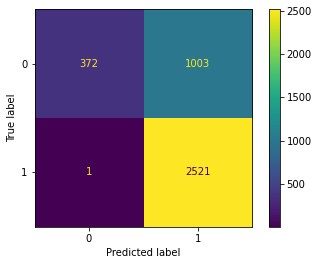

In [ ]:
RF_mixed_acc = cal_accuracies(y_mixed_data, y_mixed_pred_RF)

##Mixed Data on second model

In [ ]:
y_mixed_pred_AB = AD_model.predict(x_mixed_data_final)


Classification Report:

               precision    recall  f1-score   support

      Class 0       0.75      0.31      0.44      1375
legit Class 1       0.72      0.94      0.81      2522

     accuracy                           0.72      3897
    macro avg       0.73      0.63      0.63      3897
 weighted avg       0.73      0.72      0.68      3897


Confusion Matrix:

[[ 431  944]
 [ 142 2380]]

Accuracy Score:

0.7213240954580447
\Confusion Matrix Display:



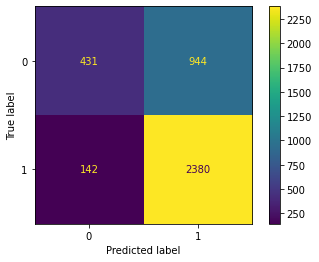

In [ ]:
AB_mixed_acc = cal_accuracies(y_mixed_data, y_mixed_pred_AB)

##Plot

In [ ]:
values = [RF_mixed_acc, AB_mixed_acc]
axis_x = ['RF', 'Adaboost']
fig=express.bar(x=axis_x, y=values, title="Accuracy Under Mixed Test Dataset", labels=dict(x="Models", y="Accuracy"))
fig.update_yaxes(tick0=0.5, dtick=0.05)
fig.update_yaxes(showgrid=False)
fig.show()

#Discriminator

In [ ]:
discriminator_pred = discriminator.predict(scaler.transform(x_mixed_data_final))

In [ ]:
discriminator_pred

array([[0.57477736],
       [0.93588215],
       [0.70250297],
       ...,
       [0.26107824],
       [0.00316095],
       [0.42230248]], dtype=float32)

In [ ]:
for i in range(len(discriminator_pred)):
  if discriminator_pred[i] >= 0.5:
    discriminator_pred[i] = 1
  else:
    discriminator_pred[i] = 0
  
discriminator_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
x_mixed_data_final['Ligitimacy'] = y_mixed_data.to_numpy()
x_mixed_data_final['d_prediction'] = discriminator_pred.reshape(-1).astype(int)

In [ ]:
x_mixed_data_final

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy,d_prediction
0,3853,45.567007,-75.211538,5,12,48,20,20,6,58,0,337840,1,1
1,1267,45.514863,-75.297589,2,10,14,40,30,10,48,1,253373,0,1
2,1366,45.554577,-75.110342,3,7,29,60,30,10,46,1,319084,1,1
3,1927,45.402752,-75.249258,1,11,45,50,30,8,55,0,56315,0,1
4,3578,45.522315,-75.229290,4,21,57,60,20,2,66,0,262765,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,1599,45.584291,-75.186542,4,10,52,60,34,10,100,1,375375,0,0
3893,186,45.584291,-75.132921,6,2,59,60,45,10,100,1,375388,0,0
3894,1944,45.584290,-75.204159,5,17,37,60,29,10,100,1,375370,0,0
3895,3999,45.156475,-75.107492,6,16,59,58,35,8,31,1,368052,0,0


##Real data from discriminator

In [ ]:
real_data_df = x_mixed_data_final[x_mixed_data_final.d_prediction==1]
real_data_df.d_prediction.sum()

2716

##Real data on First model

In [ ]:
y_d_pred_RF = RF_model.predict(real_data_df.iloc[:,:-2])
y_d_pred_RF

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
y_actual = real_data_df.Ligitimacy


Classification Report:

               precision    recall  f1-score   support

      Class 0       1.00      0.76      0.86       439
legit Class 1       0.96      1.00      0.98      2277

     accuracy                           0.96      2716
    macro avg       0.98      0.88      0.92      2716
 weighted avg       0.96      0.96      0.96      2716


Confusion Matrix:

[[ 332  107]
 [   1 2276]]

Accuracy Score:

0.9602356406480118
\Confusion Matrix Display:



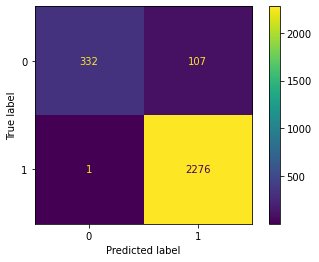

In [ ]:
RF_d_acc = cal_accuracies(y_actual, y_d_pred_RF)

##Real data on Second model

In [ ]:
y_d_pred_AB = AD_model.predict(real_data_df.iloc[:,:-2])


Classification Report:

               precision    recall  f1-score   support

      Class 0       0.73      0.82      0.77       439
legit Class 1       0.96      0.94      0.95      2277

     accuracy                           0.92      2716
    macro avg       0.85      0.88      0.86      2716
 weighted avg       0.93      0.92      0.92      2716


Confusion Matrix:

[[ 360   79]
 [ 134 2143]]

Accuracy Score:

0.9215758468335787
\Confusion Matrix Display:



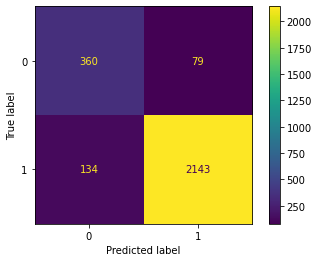

In [ ]:
AB_d_acc = cal_accuracies(y_actual, y_d_pred_AB)

##Plot

In [ ]:
values = [RF_d_acc, AB_d_acc]
axis_x = ['RF', 'Adaboost']
fig=express.bar(x=axis_x, y=values, title="Accuracy Under Discriminator True Dataset", labels=dict(x="Models", y="Accuracy"))
fig.update_yaxes(tick0=0.5, dtick=0.05)
fig.update_yaxes(showgrid=False)
fig.show()